In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df = sns.load_dataset('iris')

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [40]:
df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [41]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [44]:
y_pred = LR.predict(X_test)

In [45]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

1.0

In [47]:
from sklearn.linear_model import LogisticRegression
LRmulti = LogisticRegression(multi_class='multinomial')
LRmulti.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

In [48]:
y_pred_multi = LRmulti.predict(X_test)

In [49]:
y_pred_multi

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_multi)

1.0

In [53]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred_multi)

In [54]:
score

1.0

In [59]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_pred_multi)

In [60]:
pd.DataFrame(CM)

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [61]:
Coustom_Input = [[4.9,3.0,8.4,0.2]]
Result = LRmulti.predict_prob(Coustom_Input)
if Result == [0]:
    print("Iris-setosa")
elif Result == [1]:
    print("Iris-versicolor")
else:
    print("Iris-virginica ")

Iris-virginica 


In [76]:
Result1 = LRmulti.predict_proba(Coustom_Input)
a = Result1[0][0]
b = Result1[0][1]
c = Result1[0][2]
print(a,b,c)

7.432697703611655e-09 0.0009970465476656313 0.9990029460196367


In [77]:
max(a,b,c) 
#Iris Virginica

0.9990029460196367

In [115]:
X1 = X.iloc[:,0:3]
X1 = X1.drop(['sepal_width'],axis=1)
X1

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression( multi_class='multinomial')
LR2.fit(X_train,y_train)
y_pred_2 = LR2.predict(X_test)

In [121]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_2)

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

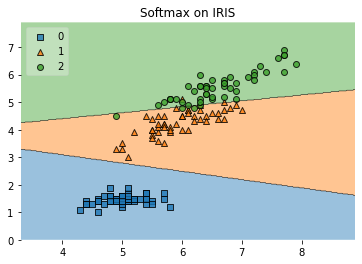

In [122]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X1.values,y.values,LR2,legend=2,)
plt.title('Softmax on IRIS')
plt.show()

In [160]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv')

In [161]:
df2
df2 = df2.rename(columns={'3.159499363321345566e-02': 'X', '9.869877579082642072e-01': 'Y',
                         '0.000000000000000000e+00':'class'})

In [162]:
df2

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [163]:
X = df2.iloc[:,:2].values
y = df2.iloc[:,-1].values

<IPython.core.display.Javascript object>

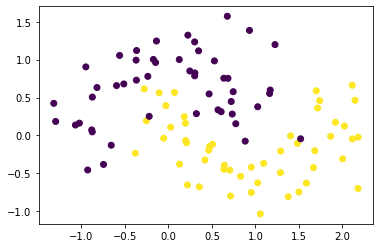

In [164]:
plt.scatter(X[:,0],X[:,1],c=y)

In [165]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X,y)

LogisticRegression()

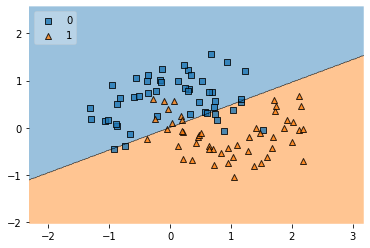

In [166]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),Lr,legend=2)

In [171]:
from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures(degree=3,include_bias=False)
X_trans = PF.fit_transform(X)

In [168]:
from sklearn.model_selection import cross_val_score
import numpy as np
np.mean(cross_val_score(Lr,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [173]:
Lr2 = LogisticRegression()
# Lr2.fit(X_trans,y)
accuracy = np.mean(cross_val_score(Lr2,X_trans,y,scoring='accuracy',cv=10))

In [188]:
accuracy

0.9099999999999999

In [198]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

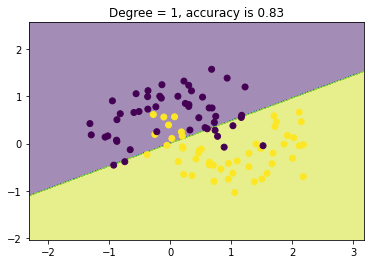

In [199]:
plot_decision_boundary(X,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

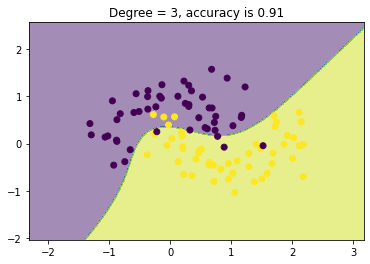

In [202]:
plot_decision_boundary(X,y,degree=3)